In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import pyodbc
from modules.get_conn import get_conn

In [37]:
conn_medw = pyodbc.connect('Driver=SQL Server;' 
                      r'Server=eamedw.moog.com;'
                      r'Trusted_Connection=yes;')

In [2]:
conn = get_conn(server='antdw-sqlserver-dev.database.windows.net',
                username='antdwdev_admin',
                password='sm@rtf@ctory123',
                db_name='antdw-dev')

In [3]:
labor_data = pd.read_sql("""SELECT * FROM [dbo].[workorder_labor] WHERE part_nbr='D026-001D'""", conn)

In [5]:
labor_data['year'] = labor_data['act_start_date'].dt.year
labor_data['month'] = labor_data['act_start_date'].dt.month

<AxesSubplot:xlabel='year,month'>

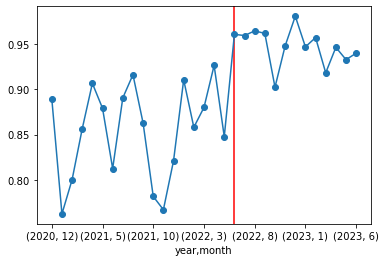

In [28]:
### CPPN yield before and after PQ release

cppn = labor_data[(labor_data['fail_code_descr']=='CPPN FAILURES') & 
                 (labor_data['opn_nbr']=='0150')]
cppn = cppn.drop_duplicates(subset=['wo_nbr'])

plt.axvline(18, c='red')
(1 - (cppn.groupby(['year','month'])['fail_code_descr'].count() / 
      labor_data.groupby(['year','month'])['wo_nbr'].nunique())).plot(marker='o')

<AxesSubplot:xlabel='year,month'>

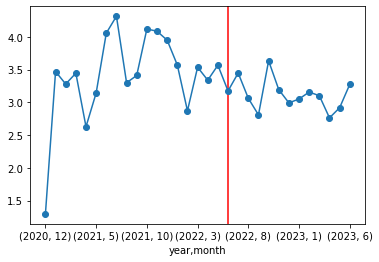

In [68]:
# processing time per servo-valve
plt.axvline(18, c='red')
(labor_data.groupby(['year','month'])['rglr_hrs'].sum()/labor_data.groupby(['year','month'])['wo_nbr'].nunique()).plot(marker='o')

<AxesSubplot:xlabel='year,month'>

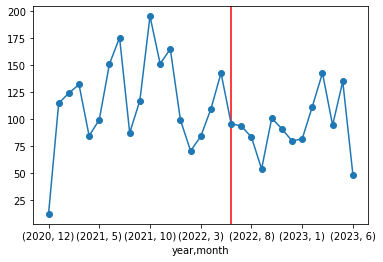

In [51]:
### Hours spent on PATP reworks
plt.axvline(18, c='red')
labor_data[labor_data['opn_nbr']=='0990'].groupby(['year','month'])['rglr_hrs'].sum().plot(marker='o')

In [35]:
labor_data[labor_data['fail_code_key']!=1].groupby(["worker_key"])["fail_code_descr"].value_counts()[:20]

worker_key  fail_code_descr                   
90          CPPN FAILURES                          22
            TBF LBF GLITCH                         13
            ELECTRICAL TEST FAILURES               12
            THRESHOLD                               6
            NULL BIAS FAILURES                      5
            LAP CONDITION FAILURES                  4
            UNSTABLE                                4
            LOW PRESSURE GAIN                       2
868         CPPN FAILURES                         877
            TBF LBF GLITCH                        257
            NOISE FAILURES OR OSCILLATION         200
            LAP CONDITION FAILURES                147
            UNSTABLE                              144
            THRESHOLD                              55
            VALVE PRESSURE NULL SHIFT FAILURES     34
            INTERNAL LEAKAGE FAILURES              16
            FLOW GAIN FAILURES                      5
            HIGH HYSTERSIS         